In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


In [115]:
import os
csv_path = os.getenv("HOME") +"/aiffel/pokemon_eda/data/Pokemon.csv"
original_data = pd.read_csv(csv_path)
print('슝=3')

슝=3


In [116]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


전설의 포켓몬은 800개 중 65마리!

In [5]:
# Q. 일반 포켓몬의 데이터셋도 만들어봅시다.
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### 1.1 결측치 확인

In [6]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

- #: 포켓몬 Id number. 성별이 다르지만 같은 포켓몬인 경우 등은 같은 #값을 가진다. int
- Name : 포켓몬 이름. 포켓몬 각각의 이름으로 저장되고, 800개의 포켓몬의 이름 데이터는 모두 다르다. (unique) str
- Type 1 : 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력된다. str
- Type 2 : 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가진다. str
- Total : 전체 6가지 스탯의 총합. int
- HP : 포켓몬의 체력. int
- Attack : 물리 공격력. (scratch, punch 등) int
- Defense : 물리 공격에 대한 방어력. int
- Sp. Atk : 특수 공격력. (fire blast, bubble beam 등) int
- Sp. Def : 특수 공격에 대한 방어력. int
- Speed : 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정. (더 높은 포켓몬이 먼저 공격한다) int
- Generation : 포켓몬의 세대. 현재 데이터에는 6세대까지 있다. int
- Legendary : 전설의 포켓몬 여부. !! Target feature !! bool

1️⃣ `#`: ID number

In [8]:
len(set(pokemon["#"]))

721

In [9]:
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


예를 들어 #6의 포켓몬은 Charizard, CharizardMega Charizard X, CharizardMega Charizard Y 세 개로 나뉩니다.
기본 포켓몬인 Charizard(리자몽)로부터 시작해서 진화한 Mega Charizard가 있고, X, Y는 버전을 나타내는 것으로 보입니다.

2️⃣ `Name` : 이름

In [11]:
# 포켓몬 이름은 총 몇 종류일까?
len(set(pokemon['Name']))

800

- 모든 이름은 unique

3️⃣ Type 1 & Type 2 : 포켓몬의 속성
- eg) 피카츄(전기), 파이리(불) : 각 포켓몬에게 속성이 존재



In [12]:
pokemon.loc[[6,10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


- 6번 포켓몬 Charizard : Fire와 Flying 속성 두 가지
- 8번 포켓몬 Wartortle : Water 속성 단 한 가지

⇢ 데이터셋에서 한 개 속성을 가지는 포켓몬 : (Type 1에만 속성 표시 + Type 2 = NaN)

In [13]:
# 각 속성의 종류
len(list(set(pokemon["Type 1"]))), len(set(pokemon["Type 2"]))

(18, 19)

In [14]:
# Python Set difference() Method

x = {"apple", "banana", "cherry"}
y = {"google", "microsoft", "apple"}

z = y.difference(x)

print(z)

{'microsoft', 'google'}


In [16]:
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

- NaN 데이터 외 나머지 18가지 속성은 `Type 1`, `Type 2` 모두 같은 세트의 데이터가 저장됨

In [17]:
# 포켓몬 모든 타입을 types 에 저장
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Ghost', 'Fairy', 'Fire', 'Steel', 'Dragon', 'Normal', 'Poison', 'Fighting', 'Grass', 'Ground', 'Psychic', 'Flying', 'Rock', 'Dark', 'Ice', 'Water', 'Electric', 'Bug']


In [18]:
# NaN 값 개수 확인
# Type2=NaN 값 개수 : Type을 하나만 갖고 있는 포켓몬 마리 수 
pokemon["Type 2"].isna().sum()

386

- `Type 1` 데이터 분포 plot


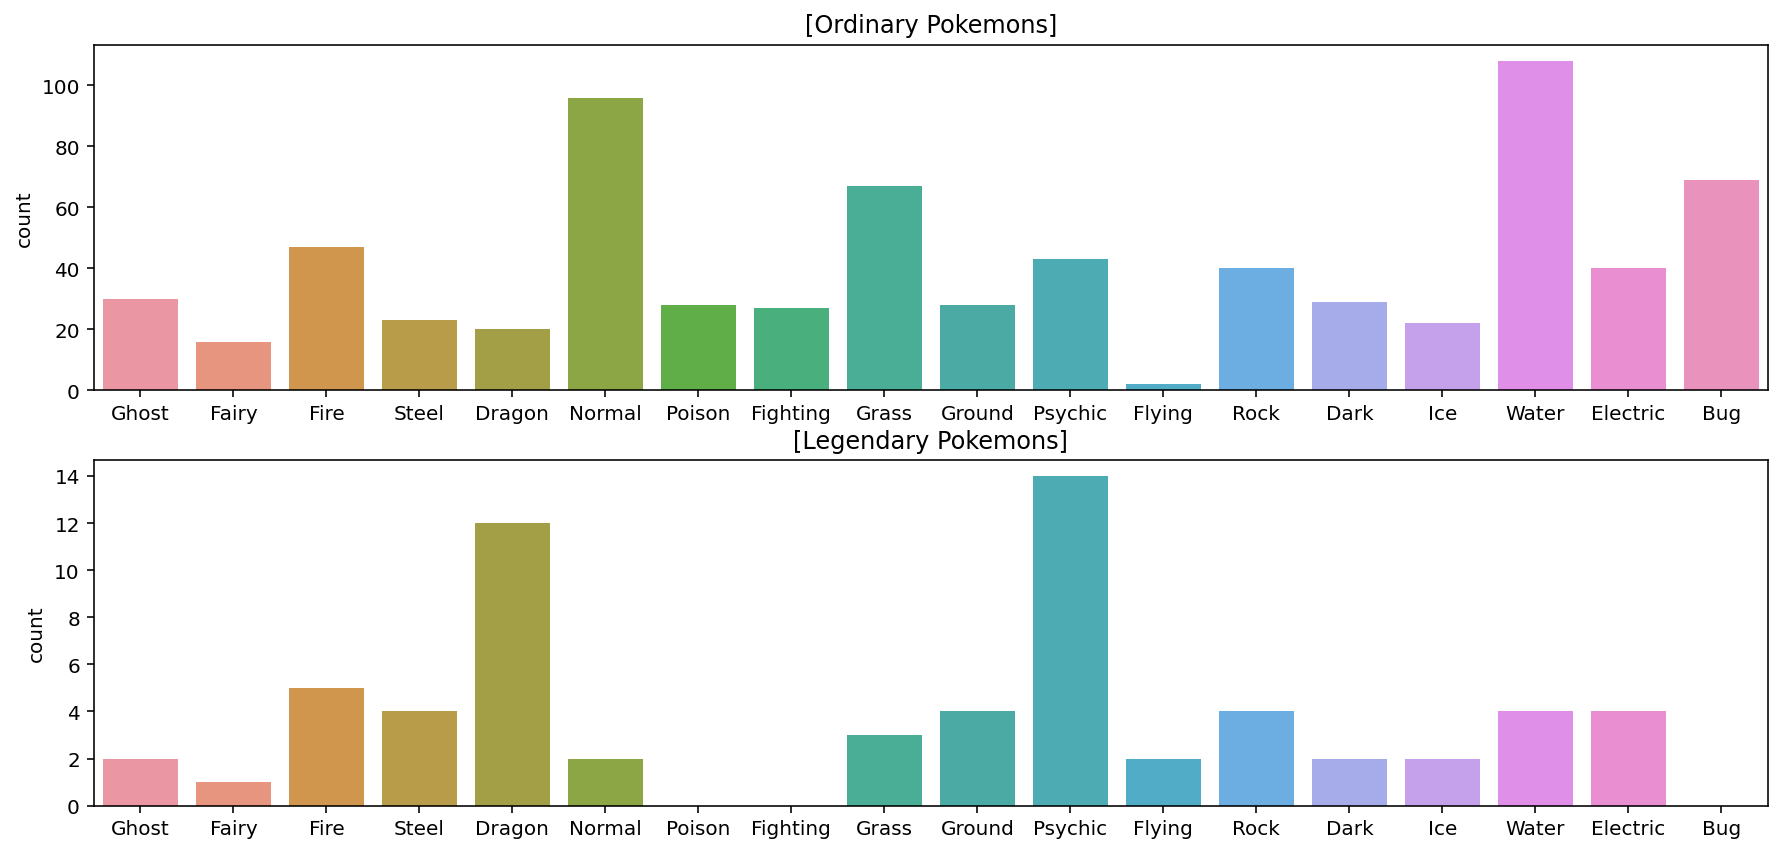

In [20]:
plt.figure(figsize=(15, 7))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

- [Ordinary Pokemons] : Normal(노말), Water(물), Bug(벌레) 속성이 상위 3
- [Legendary Pokemons] : Dragon(드래곤), Psychic(에스퍼) 속성

In [25]:
# Type1 별로 Legendary 비율 - 각 속성에 얼만큼의 전설포켓몬의 있는가 
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


- flying 속성 중 전설이 가장 높은 비율로 있지만
- 전체 카운트 수가 적어서 데이터플랏으로는 수치가 낮았음
- 날아다니는 포켓몬 높은 비율로 전설 포켓몬

- `Type 2` 데이터 분포 plot

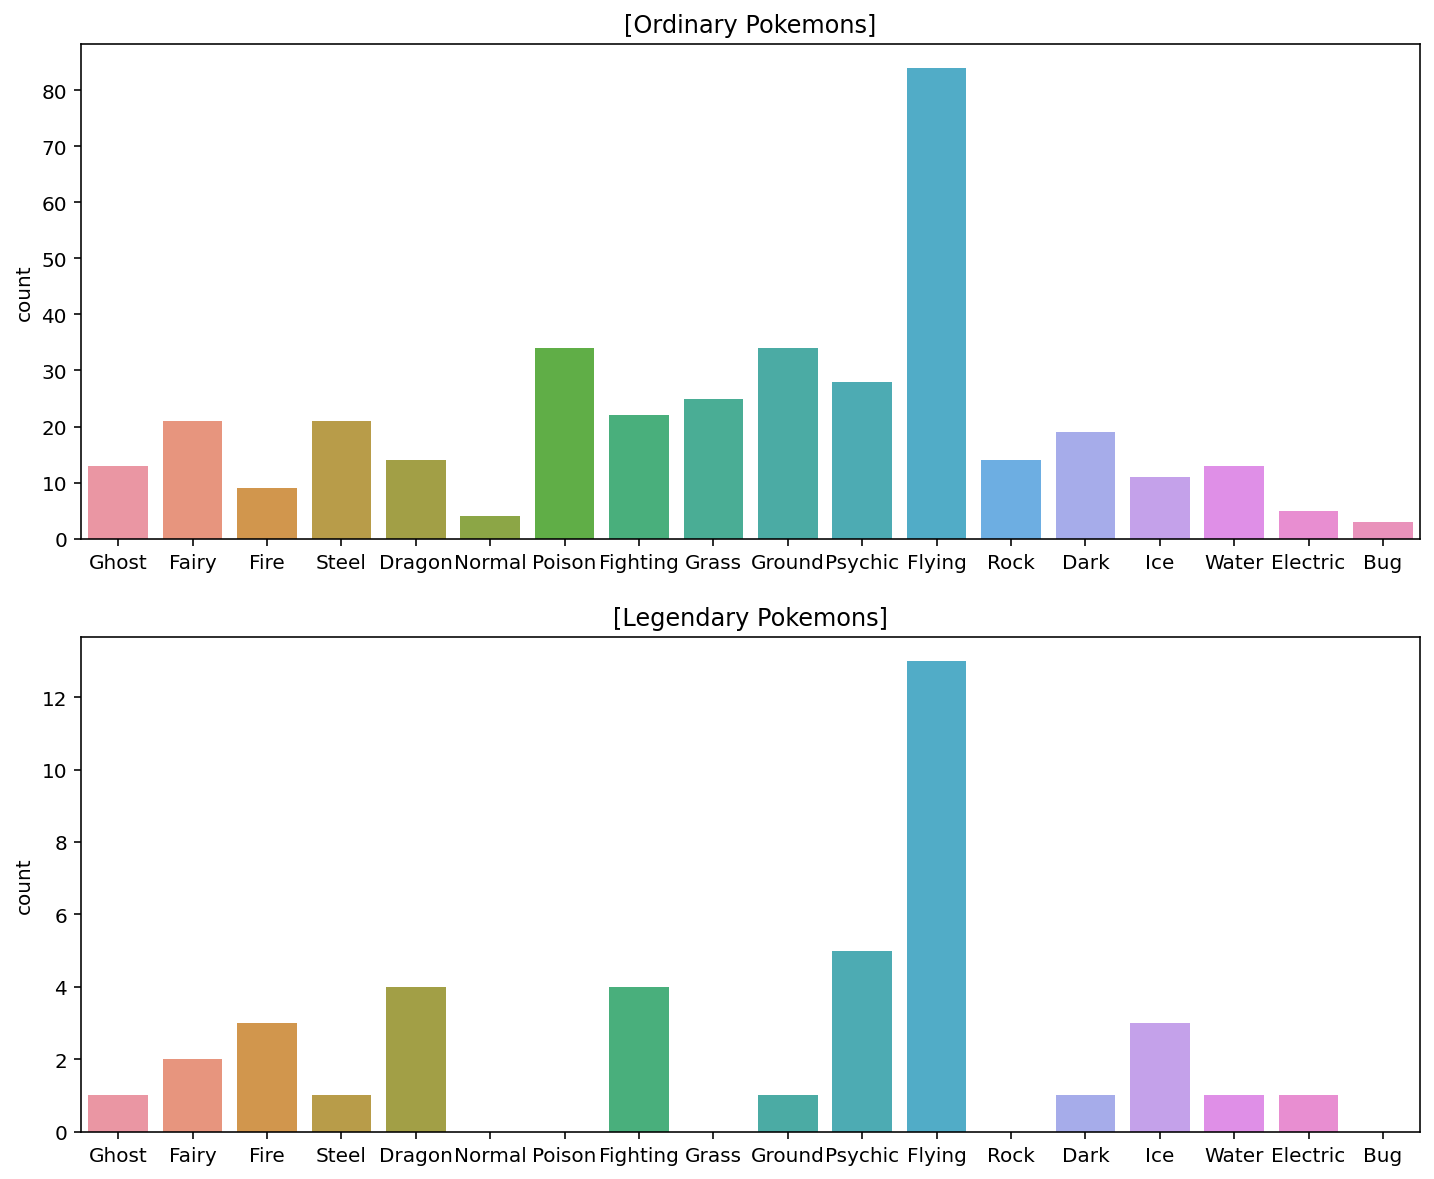

In [26]:
plt.figure(figsize=(12, 10))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

Flying 속성의 경우 두 경우 다 가장 많지만, 일반 포켓몬에는 Grass, Rock, Poison같은 속성이 많은 반면 전설의 포켓몬은 하나도 없습니다.

대신 여전히 Dragon, Psychic과 더불어 Fighting과 같은 속성이 많습니다.

In [27]:
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


- `Type 2` : Fire 속성 포켓몬의 Legendary 비율이 25%로 가장 높음

4️⃣ `Total`: 모든 스탯의 총합
-  6가지 속성값의 총합

In [28]:
# 모든 스탯의 종류 stats라는 변수에 저장
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [29]:
# 확인
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [40]:
# 전체 포켓몬 확인
print(f"total이 stats 총합인 데이터 수:{len(pokemon[pokemon['Total'] == pokemon[stats].values.sum(axis=1)])}")
pokemon[pokemon['Total'] == pokemon[stats].values.sum(axis=1)]


total이 stats 총합인 데이터 수:800


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


- `Total`값에 따른 분포 plot



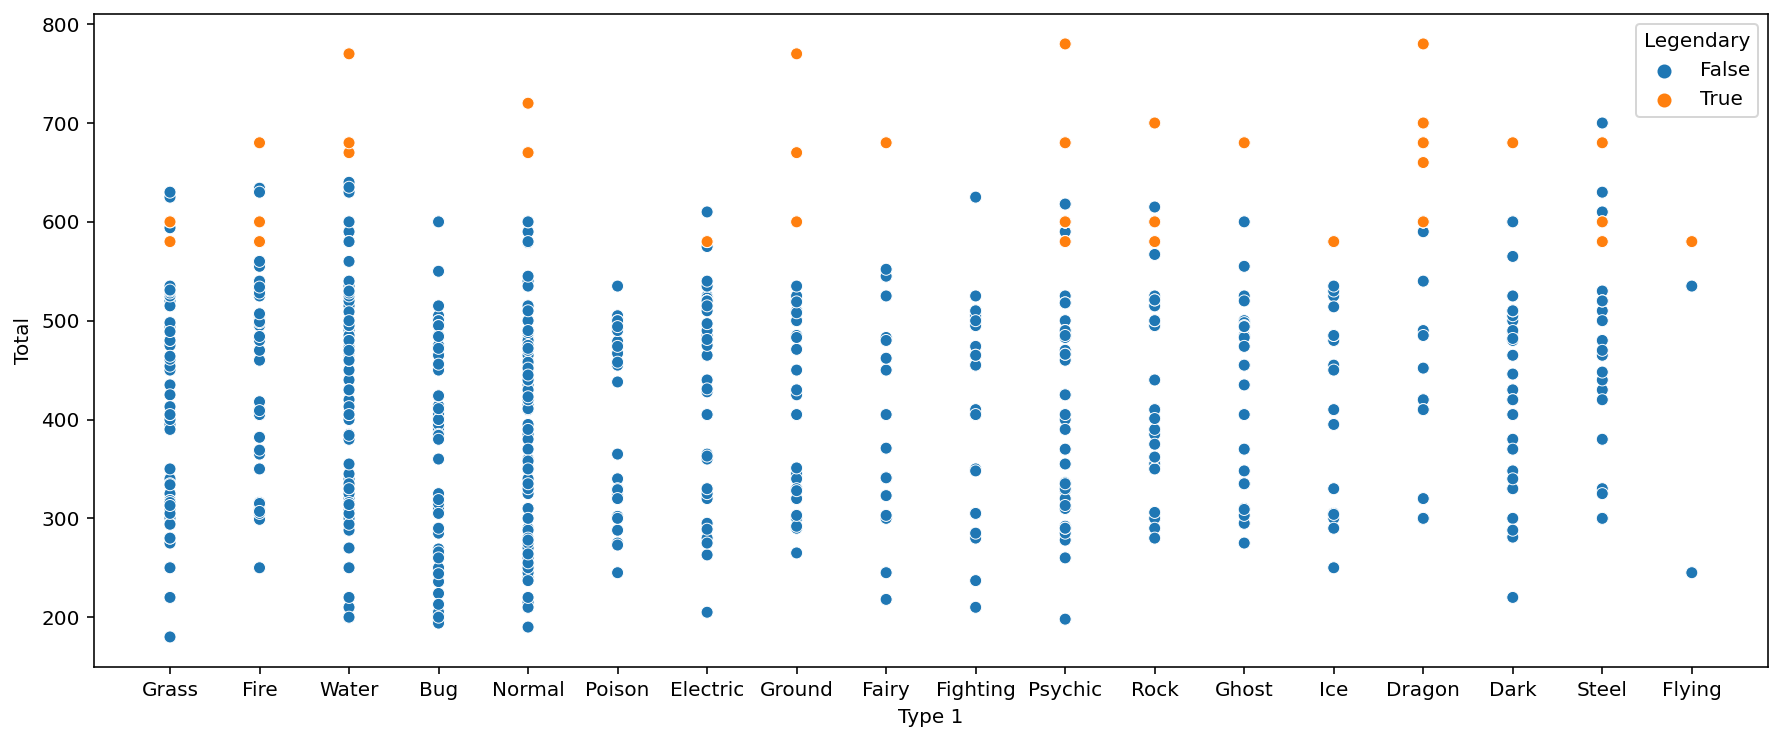

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

- 전설포켓몬은 주로 total 스탯값이 높음

5️⃣ 세부 스탯
- 세부스탯: HP, Attack, Defense, Sp. Atk, Sp. Def, Speed

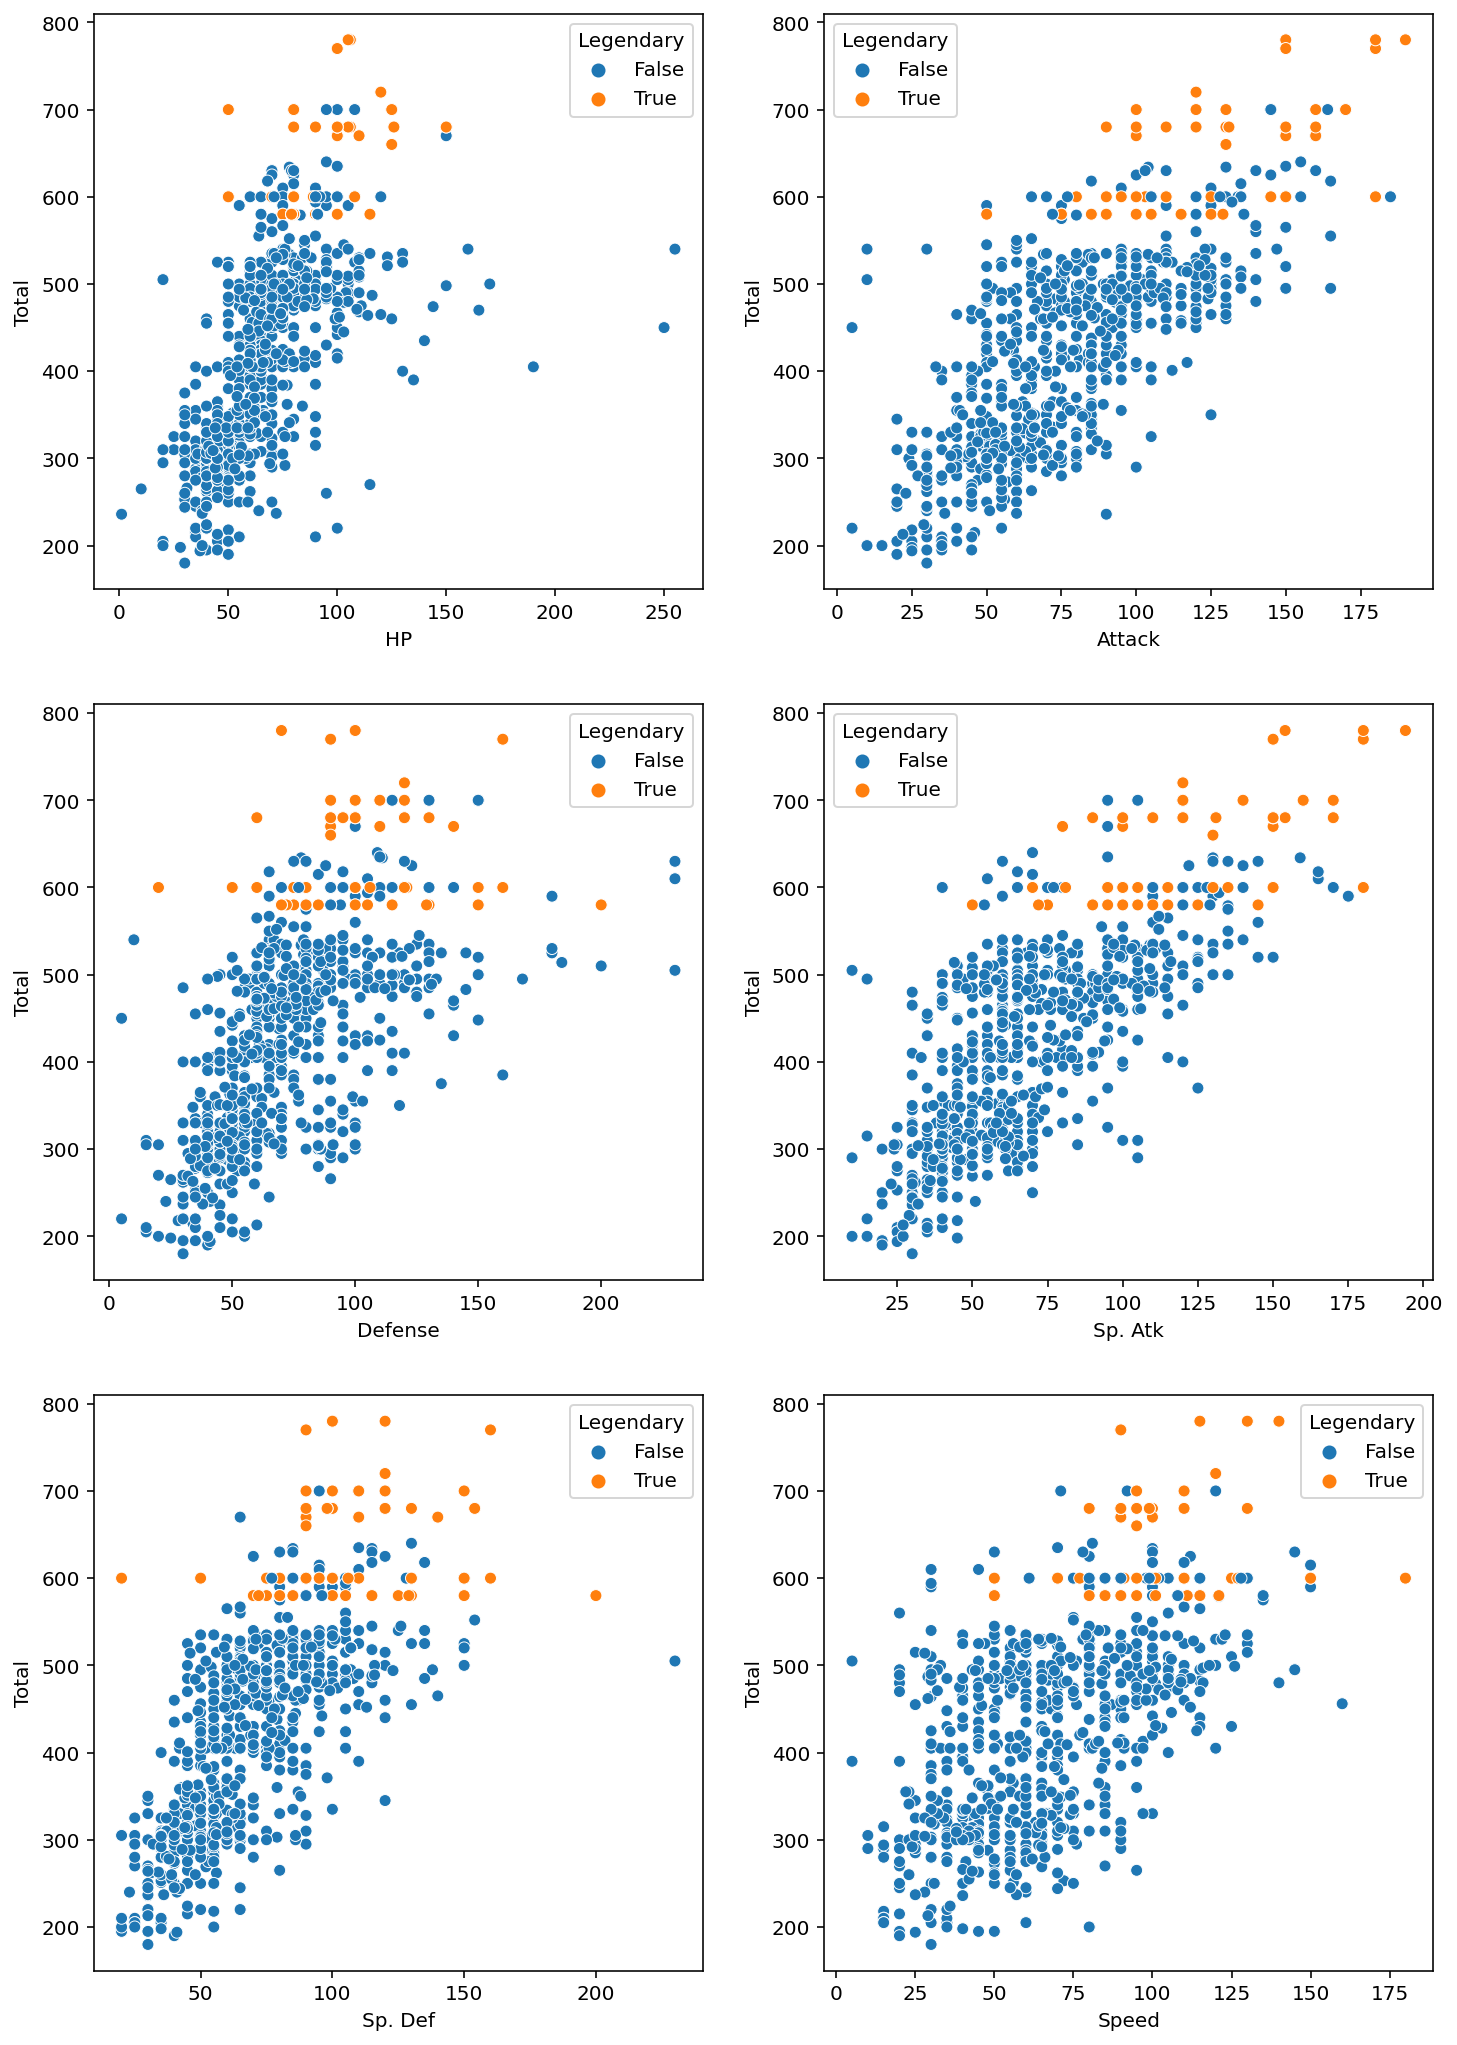

In [43]:
# 각각의 스탯에 대한 scatter plot을 6개의 subplot으로 표현

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)

plt.show()

- HP, Defense, Sp. Def
    - 전설의 포켓몬은 주로 높은 스탯을 갖지만, 이 세 가지에서는 일반 포켓몬이 전설의 포켓몬보다 특히 높은 몇몇 포켓몬이 있습니다.
    - 그러나 그 포켓몬들도 Total 값은 특별히 높지 않은 것으로 보아 특정 스탯만 특별히 높은, 즉 특정 속성에 특화된 포켓몬들로 보입니다. (ex. 방어형, 공격형 등)

- Attack, Sp. Atk, Speed
    - 이 세 가지 스탯은 Total과 거의 비례합니다.
    - 전설의 포켓몬이 각 스탯의 최대치를 차지하고 있습니다.

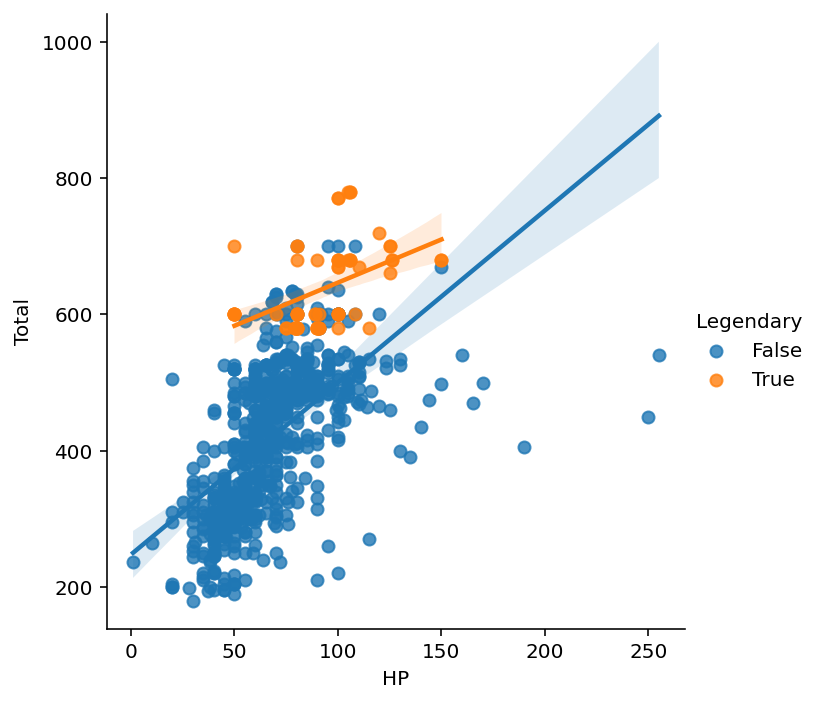

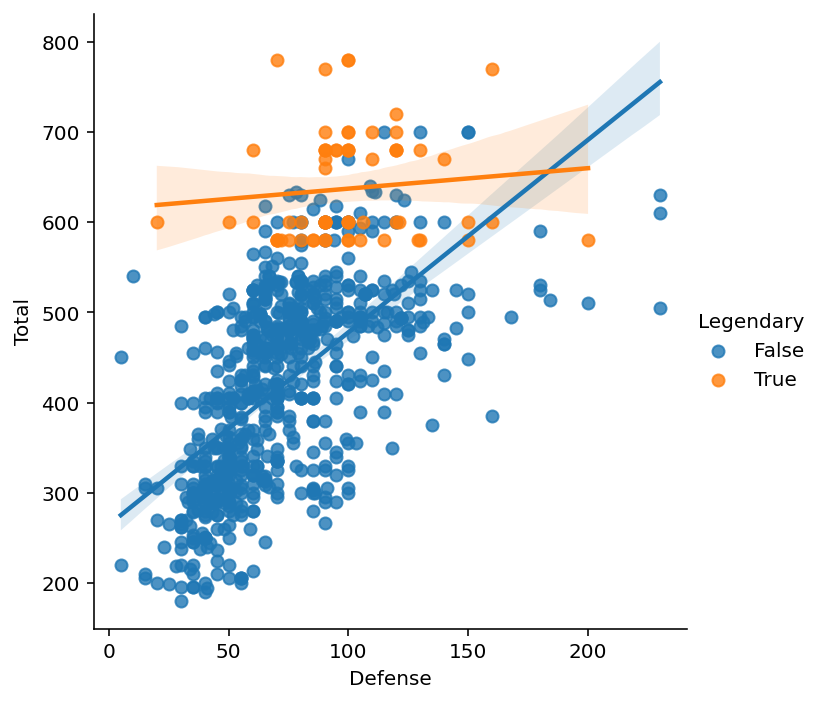

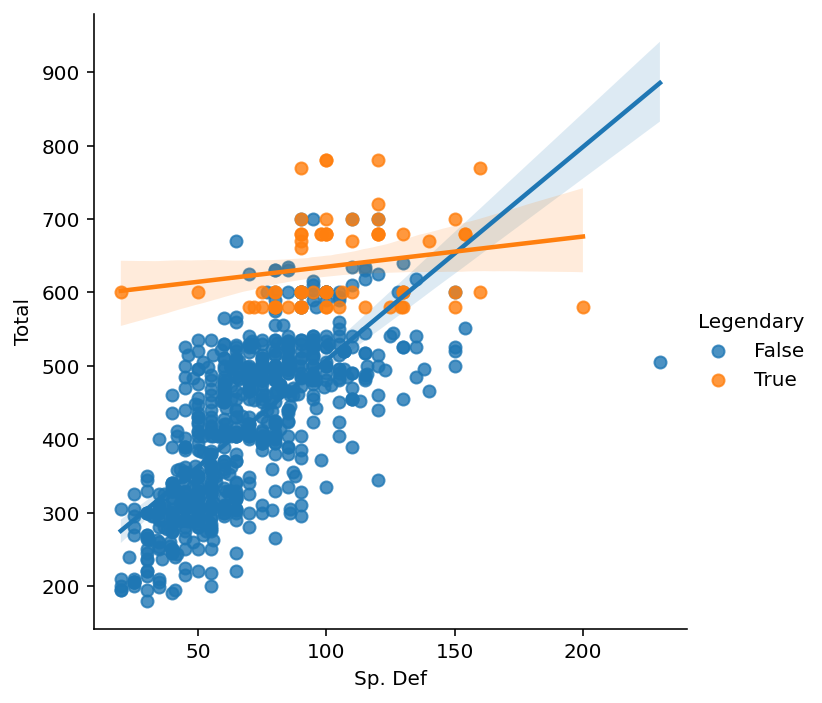

In [209]:
# 각각의 스탯에 대한 lmplot 
sns.lmplot(data=pokemon, y="Total", x="HP", hue="Legendary")
sns.lmplot(data=pokemon, y="Total", x="Defense", hue="Legendary")
sns.lmplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary")

- HP, Defense, Sp. Def
- 특정 속성에 특화된 일반 포켓몬이 다수 분포되어 있음

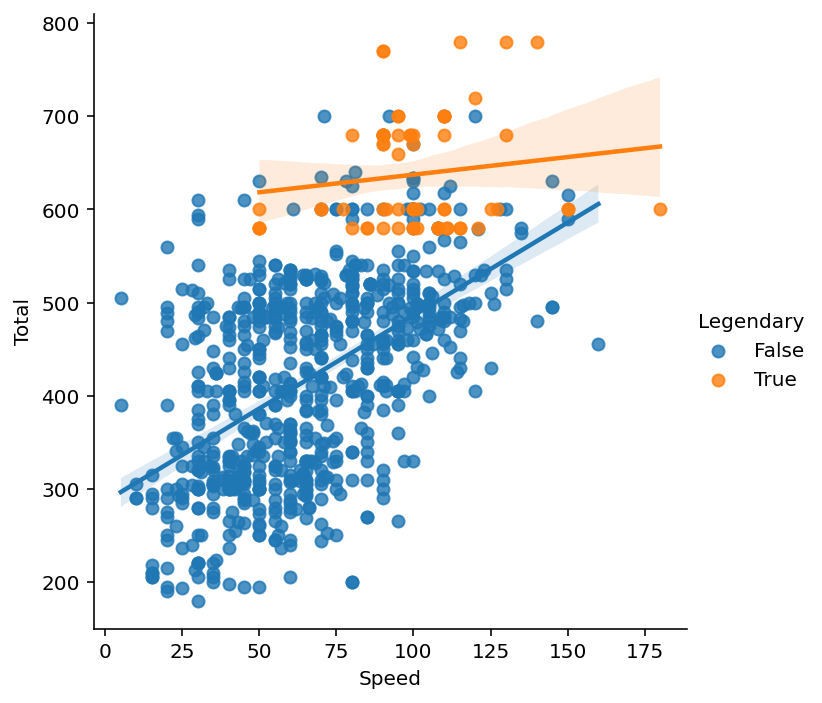

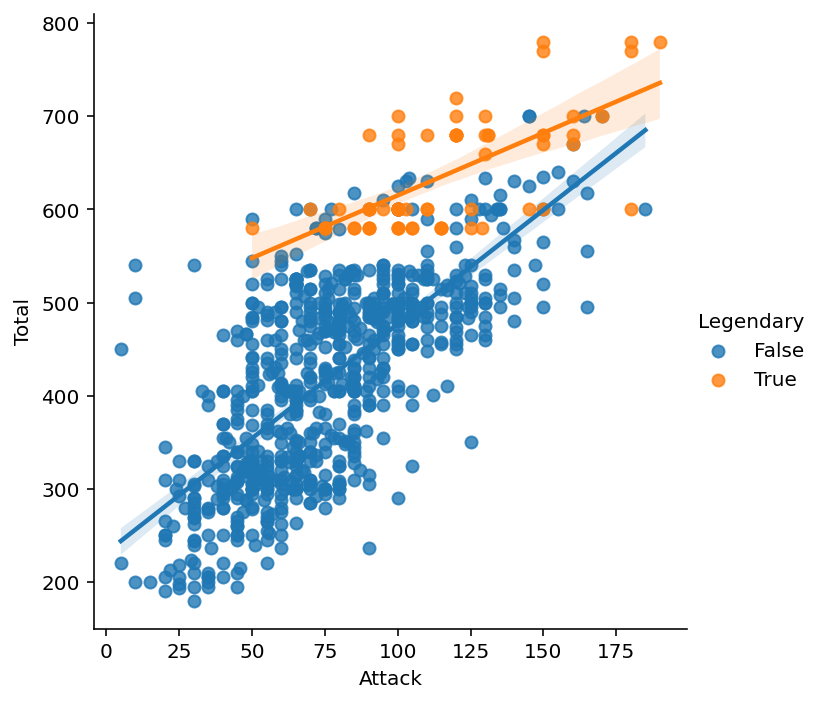

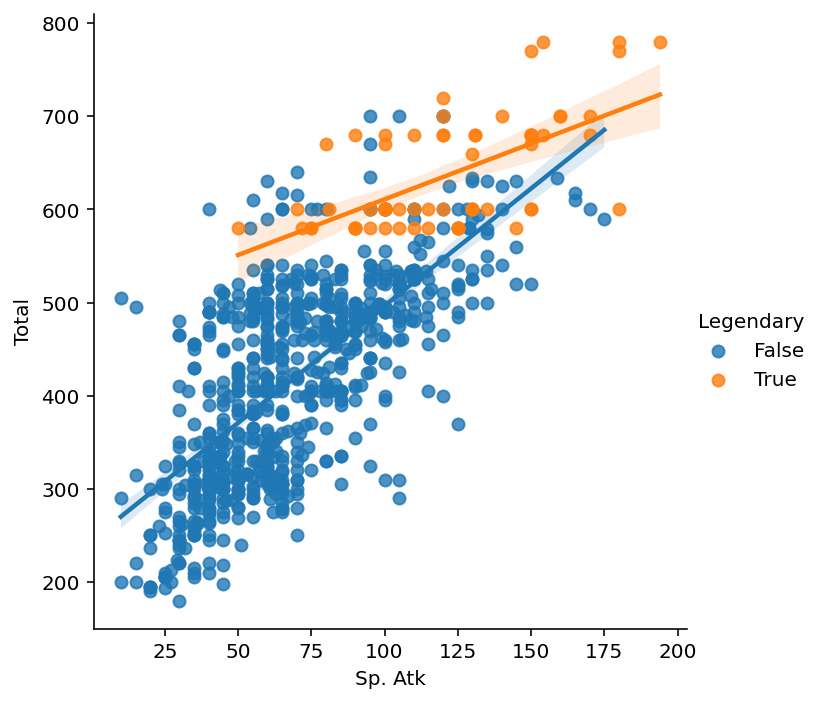

In [210]:
sns.lmplot(data=pokemon, y="Total", x="Speed", hue="Legendary")
sns.lmplot(data=pokemon, y="Total", x="Attack", hue="Legendary")
sns.lmplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary")

- Total과 비례한 Attack, Sp. Atk, Speed 세 스탯 regplot

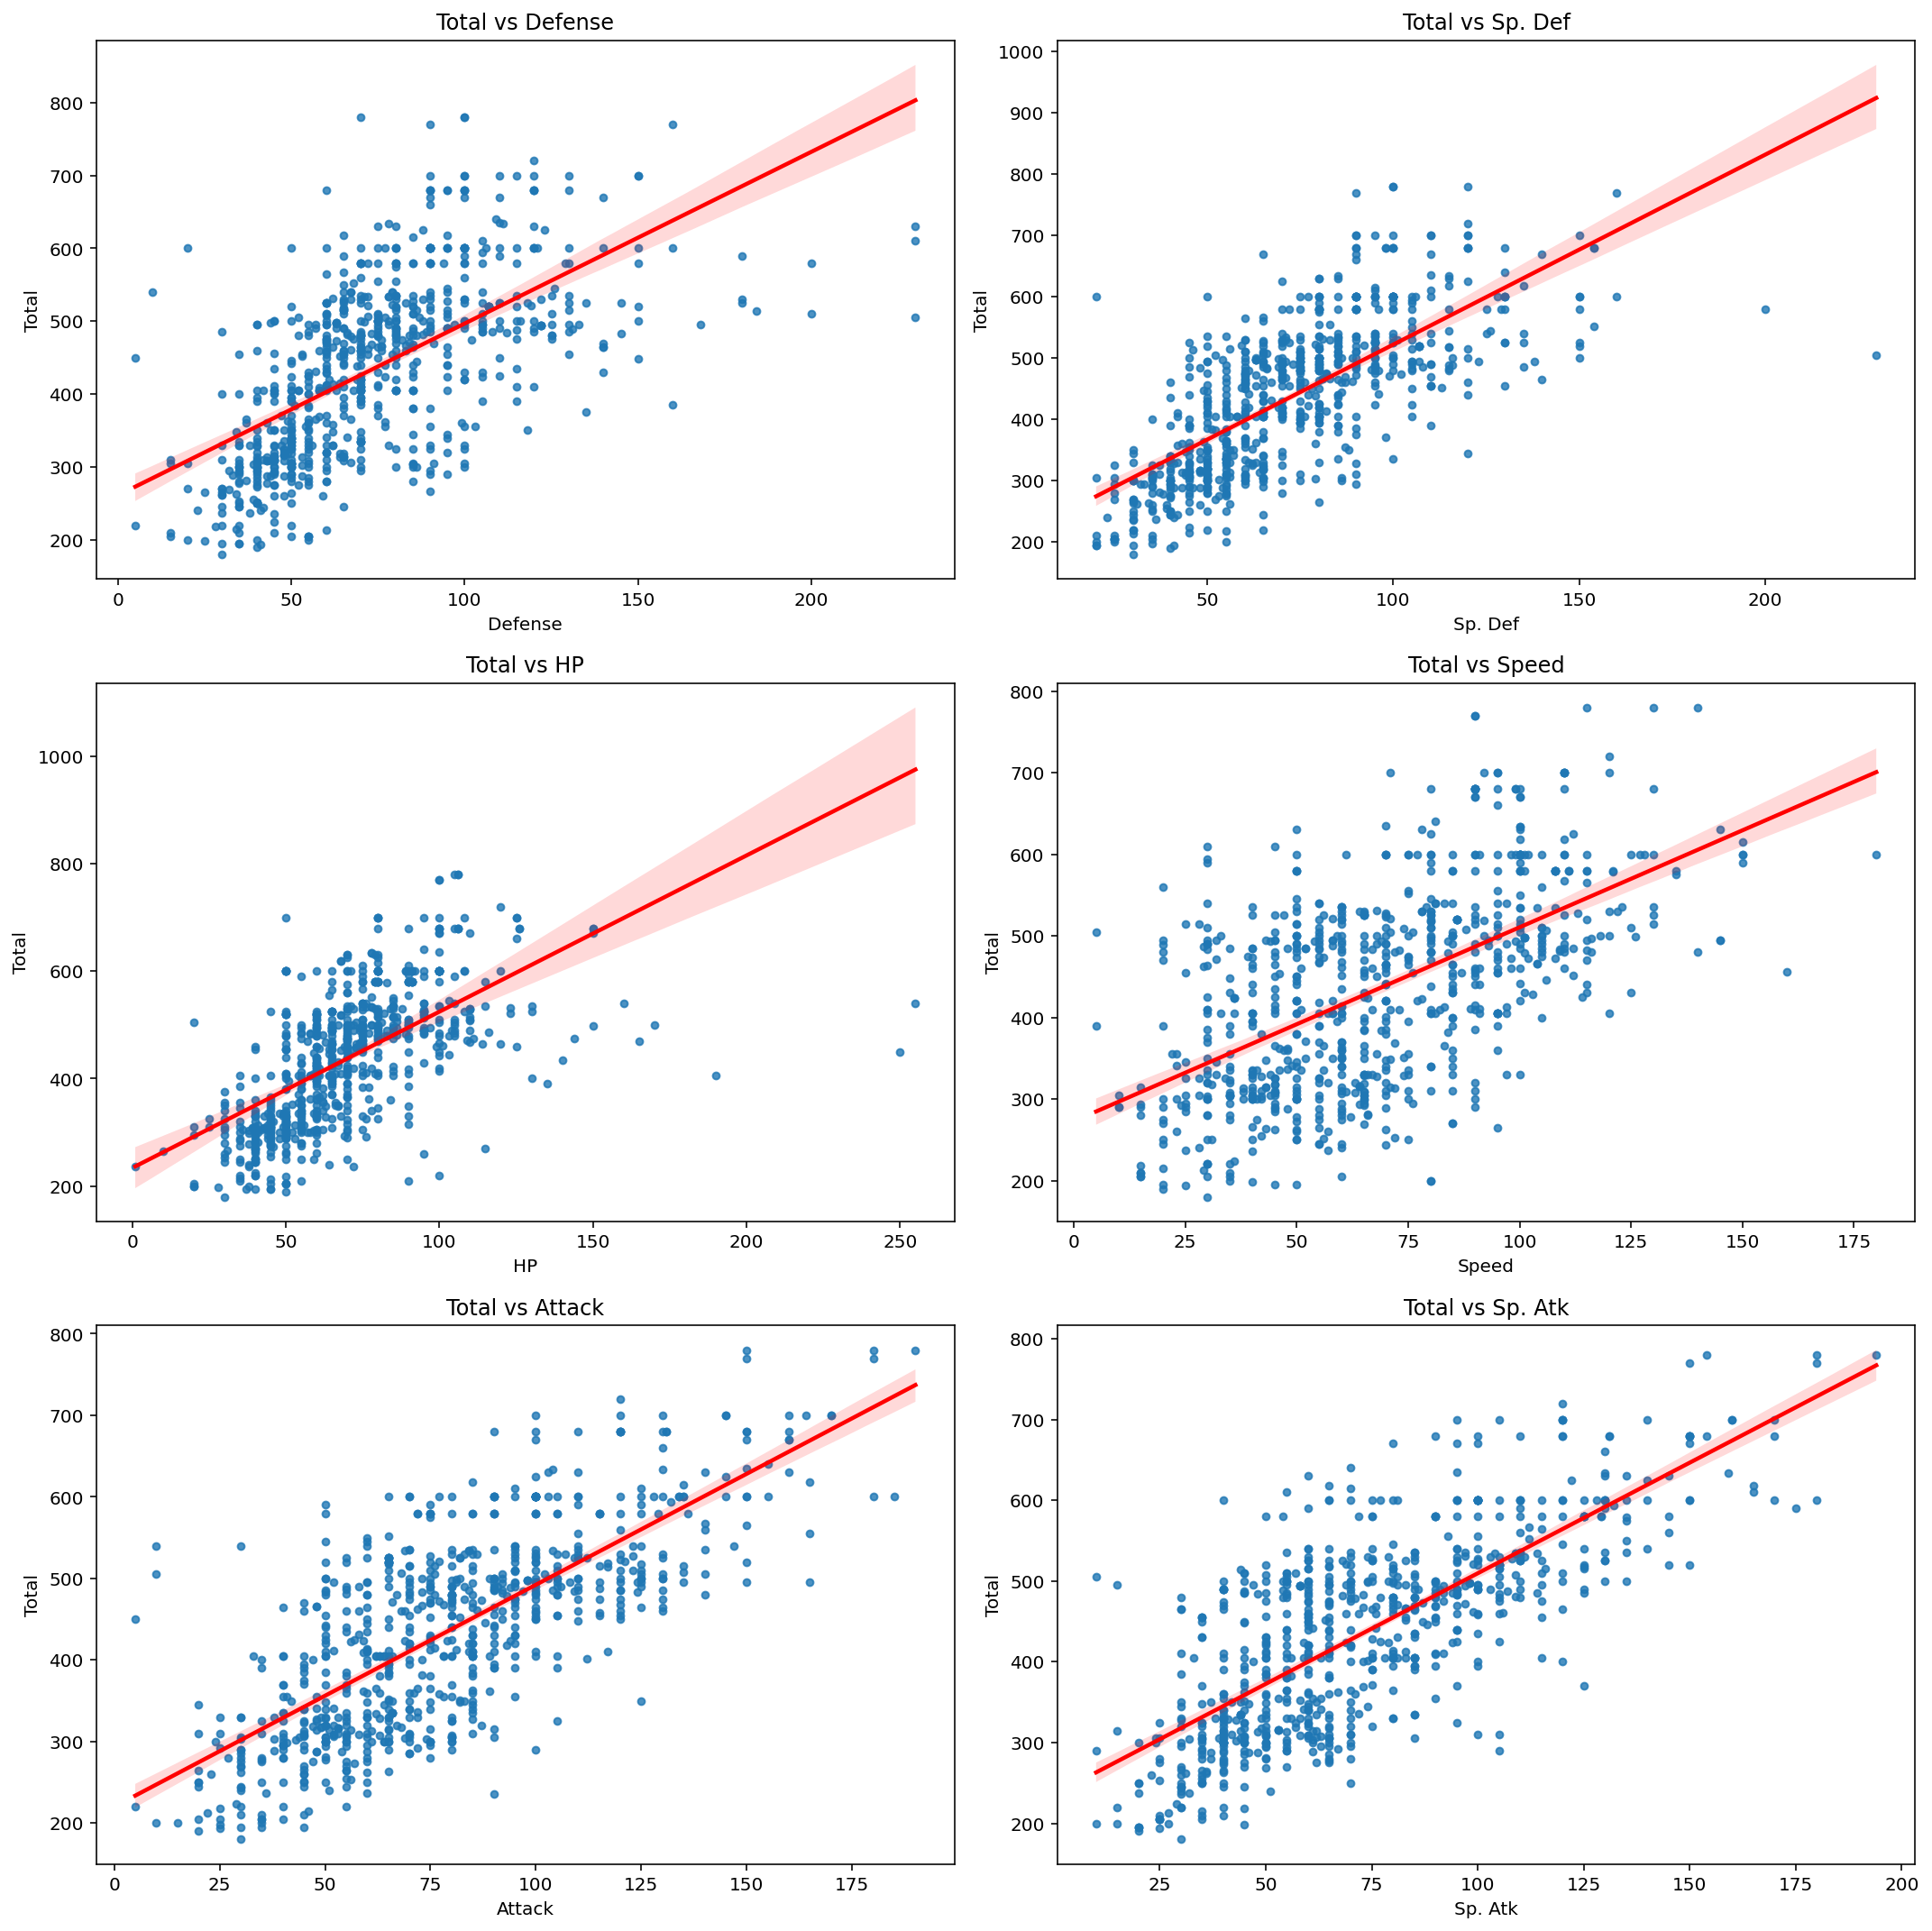

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3, 2, figsize=(15, 15)) # figsize 조정으로 적절한 크기 설정
axs = axs.flatten() # 다차원 배열을 1차원으로 평탄화

# 각 스탯에 대한 regplot 생성
stats = ['Defense', 'Sp. Def', 'HP', 'Speed', 'Attack', 'Sp. Atk']
for i, stat in enumerate(stats):
    sns.regplot(data=pokemon, x=stat, y="Total", ax=axs[i], 
                scatter_kws={'s': 15}, line_kws={'color': 'red'})
    axs[i].set_title(f'Total vs {stat}')
    axs[i].set_xlabel(stat)
    axs[i].set_ylabel('Total')

plt.tight_layout()
plt.show()


- 전체 포켓몬 대상 스탯 비교 : Attack, Sp. Atk, Speed는 Total과 높은 상관관계
- 이는 포켓몬의 전반적인 강함이 이 세 가지 공격적인 스탯에 어느정도 의존
- 이러한 스탯이 높은 포켓몬은 전투에서 주도권을 쥘 수 있는 공격력을 가지고 있다고 해석

6️⃣ `Generation`: 포켓몬 세대

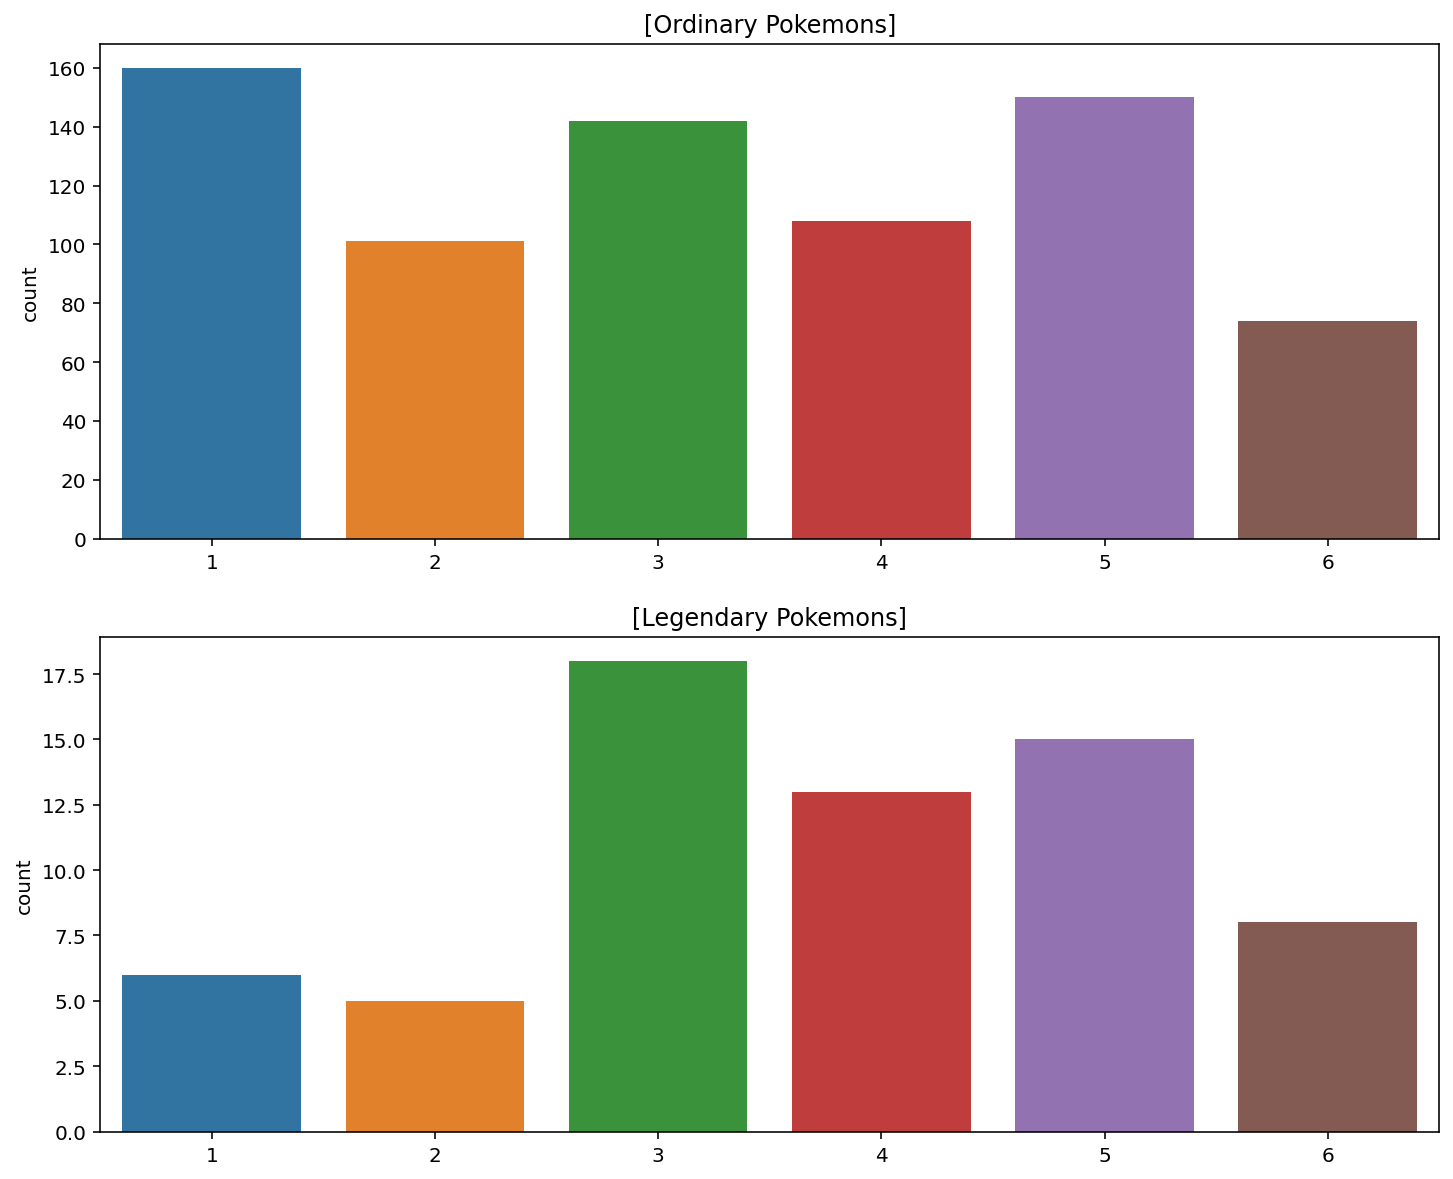

In [47]:
plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

- 전설의 포켓몬은 1, 2세대에는 많지 않았음 
- 3세대부터 많아졌다가, 6세대에 다시 줄어든 것을 확인할 수 있습니다.

## 2. 전설포켓몬과 일반포켓몬 차이

### 2.1 1️⃣ `Total`

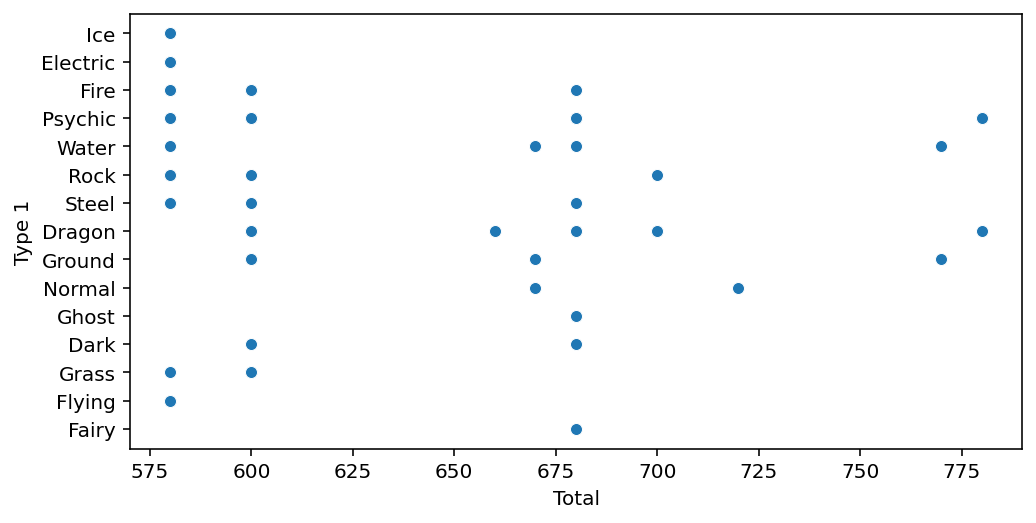

In [51]:
# 전설의 포켓몬들 Total 값 속성(Type 1)별로 확인

fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

- 특정값에 몰려있네?!

In [54]:
print(sorted(set(legendary["Total"])))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


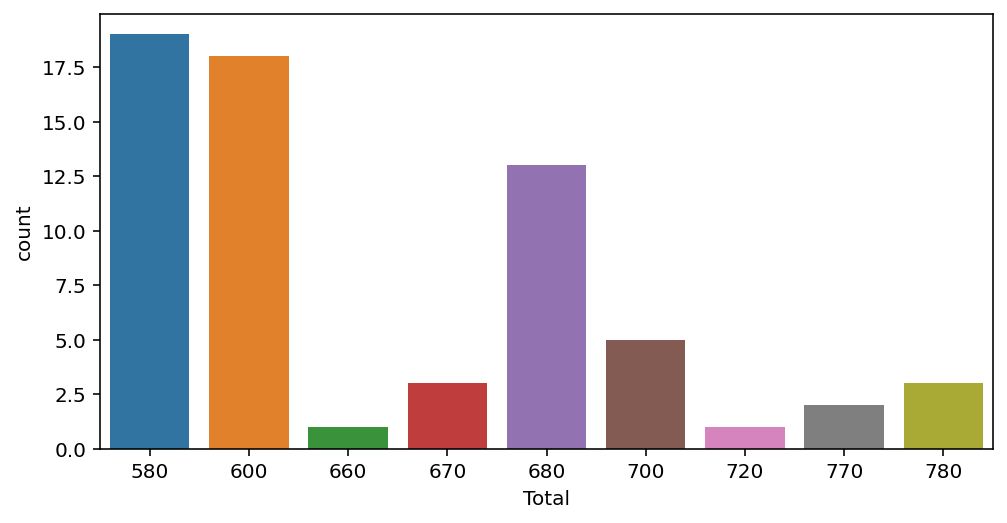

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [59]:
round(len(legendary) / legendary["Total"].nunique(), 2)

7.22

- 약 7.22마리 끼리는 같은 Total 스탯 값을 가진다

- ordinary

In [67]:
# Q. ordinary 포켓몬의 'Total' 값 집합을 확인해봅시다.
ordinary_total = sorted(list(set(ordinary["Total"])))
print(ordinary_total)

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


In [63]:
len(ordinary_total)

195

In [60]:
round(len(ordinary) / ordinary["Total"].nunique(), 2)

3.77

- 약 3.77마리만 같은 Total 스탯 값 가짐 

- Total값 다양성 : 일반 포켓몬이 전설의 포켓몬의 약 두 배 → 전설의 포켓몬 Total값 다양하지 않음
    - 한 포켓몬의 Total 속성값이 전설의 포켓몬의 값들 집합에 포함되는지의 여부는 전설의 포켓몬임을 결정하는 데에 영향 끼침

- 전설의 포켓몬의 Total 값 중에는 일반 포켓몬이 가지지 못하는 Total값 존재 ex) 680, 720, 770, 780
    - Total값은 전설의 포켓몬인지 아닌지를 결정하는 데에 이러한 방식으로도 영향을 미칠 수 있습니다.

/ 즉, Total값은 legendary인지 아닌지를 예측하는 데에 중요한 컬럼일 것이라는 결론을 내릴 수 있습니다.

### 2.2 이름

In [64]:
# 특정 단어가 들어가 있는 이름
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


- 아래 이름들 모두 세트 지어져 있음
- MewTwo", "Latias", "Latios", "Kyogre", "Groudon", "Rayquaza", "Kyurem" 등
- 포켓몬은 비슷한 이름을 가진 포켓몬 다수 존재

In [65]:
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


- 전설 포켓몬은 이름 길이가 길다?!

In [117]:
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
legendary.sample(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
25,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True,18
37,487,GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True,20
17,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True,17


In [118]:
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))
ordinary.sample(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
468,448,Lucario,Fighting,Steel,525,70,110,70,115,70,90,4,False,7
504,479,RotomWash Rotom,Electric,Water,520,50,65,107,105,107,86,4,False,15
427,411,Bastiodon,Rock,Steel,495,60,52,168,47,138,30,4,False,9


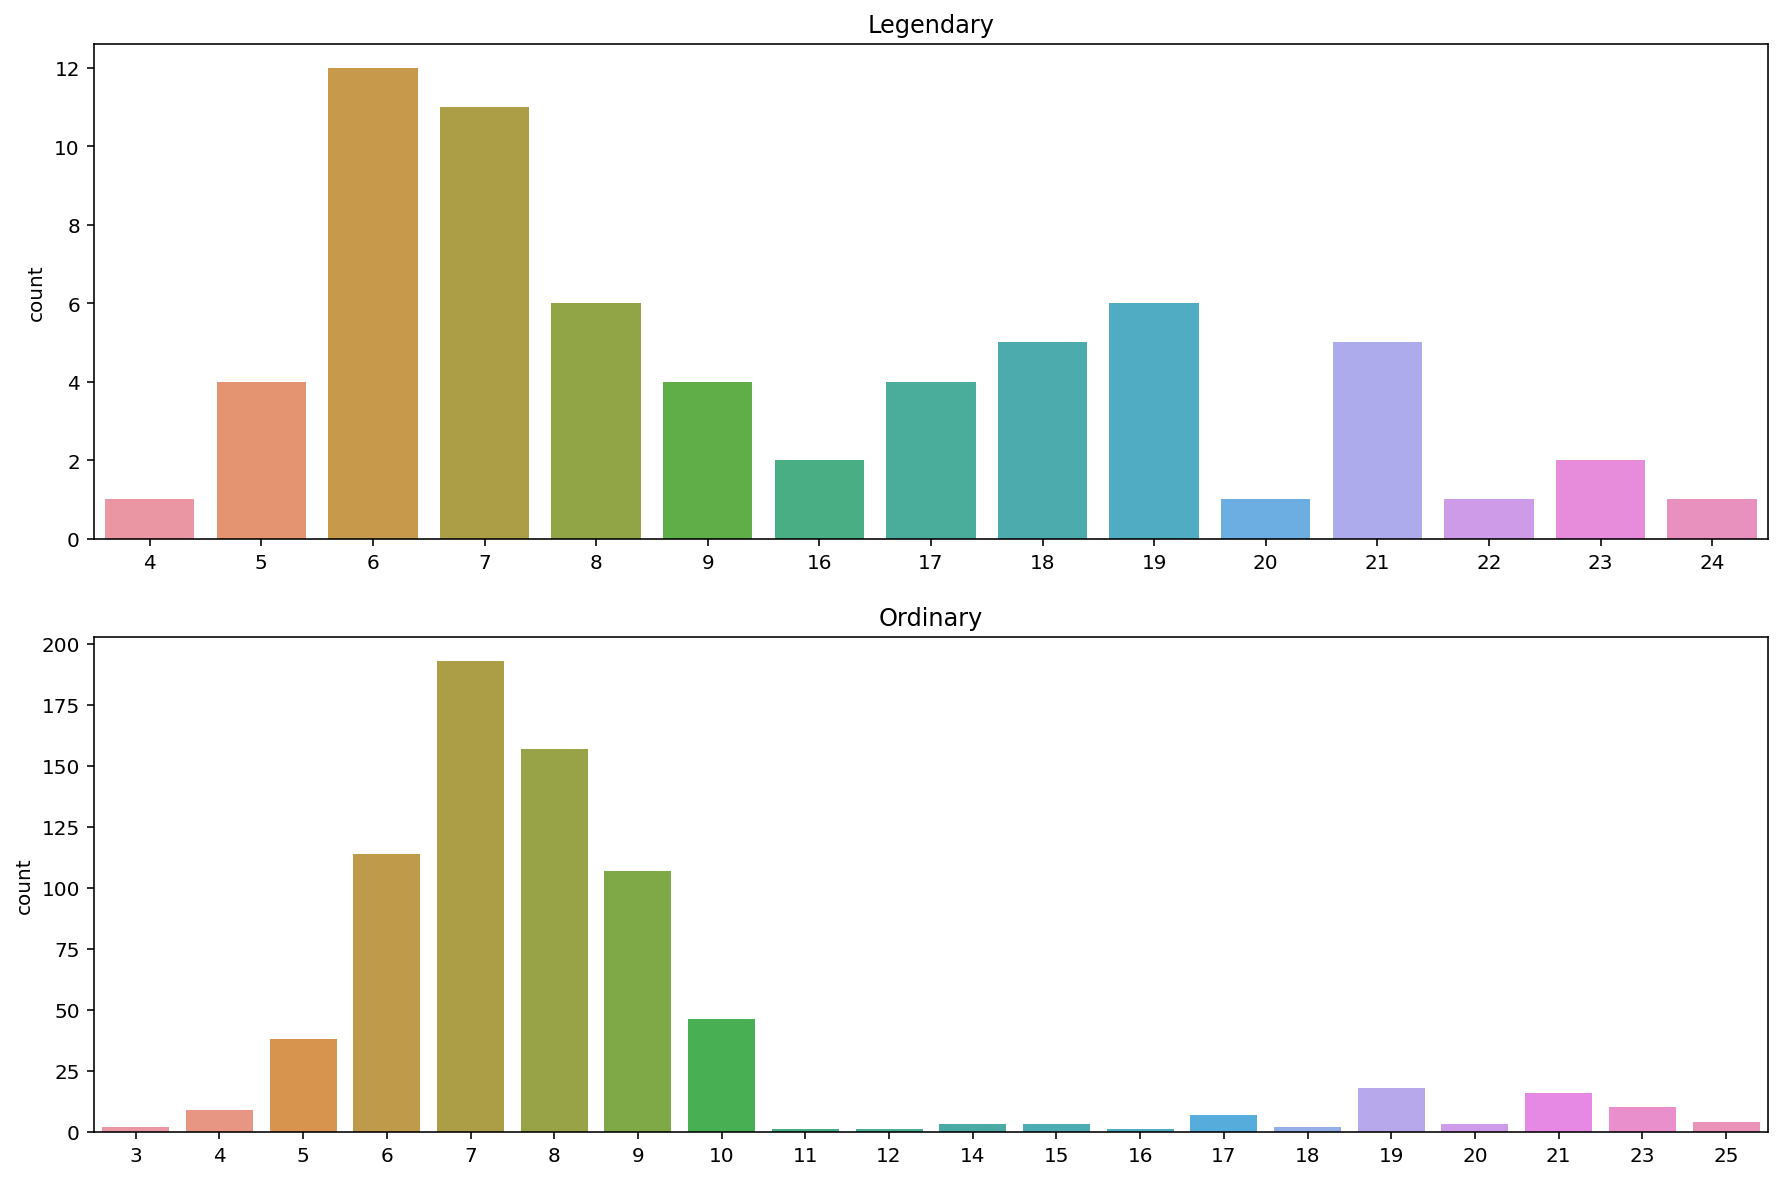

In [76]:
plt.figure(figsize=(15, 10))

plt.subplot(211)
sns.countplot(data = legendary, x='name_count').set_xlabel('')
plt.title("Legendary")

plt.subplot(212)
sns.countplot(data = ordinary, x='name_count').set_xlabel('')
plt.title("Ordinary")

plt.show()

- 전설의 포켓몬은 16 이상의 긴 이름을 가진 포켓몬이 많음
- 반면, 일반 포켓몬은 10 이상의 길이를 가지는 이름의 빈도가 아주 낮음

In [88]:
# 전설의 포켓몬 이름이 10글자 이상일 확률

print(round(len(legendary[legendary["name_count"] > 9]) 
            /len(legendary["name_count"])*100, 2),"%")

41.54 %


In [89]:
# 일반 포켓몬 이름이 10글자 이상일 확률

print(round(len(ordinary[ordinary["name_count"] > 9]) 
            /len(ordinary["name_count"])*100, 2),"%")

15.65 %


- 만약 "Latios"가 전설의 포켓몬이라면, "%%% Latios" 또한 전설의 포켓몬이다!
- 적어도 전설의 포켓몬에서 높은 빈도를 보이는 이름들의 모임이 존재한다!
- 전설의 포켓몬은 긴 이름을 가졌을 확률이 높다!

## 3. 데이터 전처리
- 모델에 넣기 위해 데이터 전처리하기

### 3.1 이름 길이가 10 이상인가?
1. 이름의 길이 : `name_count` 컬럼 생성 후 길이가 10을 넘는지 아닌지에 대한 categorical 컬럼 생성

2. 토큰 추출 : legendary 포켓몬에서 많이 등장하는 토큰을 추려내고 토큰 포함 여부를 원-핫 인코딩(One-Hot Encoding)으로 처리

In [119]:
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.sample(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
627,566,Archen,Rock,Flying,401,55,112,45,74,45,70,5,False,6
150,139,Omastar,Rock,Water,495,70,60,125,115,70,55,1,False,7
751,681,AegislashShield Forme,Steel,Ghost,520,60,50,150,50,150,60,6,False,21


In [120]:
pokemon["long_name"] = pokemon["name_count"] > 9
pokemon.sample(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
766,696,Tyrunt,Rock,Dragon,362,58,89,77,45,45,48,6,False,6,False
378,346,Cradily,Rock,Grass,495,86,81,97,81,107,43,3,False,7,False
714,647,KeldeoResolute Forme,Water,Fighting,580,91,72,90,129,90,108,5,False,20,True


- 전설의 포켓몬을 분류하는 데에 이름의 길잇값 자체를 가진 name_count 컬럼이 더 유리할지, 혹은 long_name이 더 유리할지는 아직 모릅니다.
- 모델 학습에 둘 다 활용해보자!

### 3.2 이름에 자주 쓰는 토큰 추출
- 네 가지 타입 포켓몬 이름 
1. 한 단어 ex. Venusaur
2. 두 단어이고, 앞 단어는 두 개의 대문자를 가지며 대문자를 기준으로 두 부분으로 나뉘는 경우
    - ex. VenusaurMega Venusaur
3. 이름은 두 단어이고, 맨 뒤에 X, Y로 성별을 표시하는 경우 
    - ex. CharizardMega Charizard X
4. 알파벳이 아닌 문자를 포함하는 경우 ex. Zygarde50% Forme


In [121]:
# 이름에 알파벳 아닌 문자 들어간 경우 전처리
# isalplha() : 띄어쓰기도 F 처리 되므로 먼저 띄어쓰기 제거
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [122]:
pokemon["Name_isalplha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,Name_isalplha
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion,True


In [111]:
# 알파벳 아닌 문자는?!
print(pokemon[pokemon["Name_isalplha"]==False].shape)
pokemon[pokemon["Name_isalplha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,Name_isalplha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr.Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,MimeJr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50%Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [123]:
# 알파벳으로 바꿔주기
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,Name_isalplha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [124]:
# Q. 바꿔준 'Name' 컬럼으로 'Name_nospace'를 만들고, 다시 isalpha()로 체크해봅시다.
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["Name_isalplha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["Name_isalplha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,Name_isalplha


- 이름을 띄어쓰기 & 대문자 기준으로 분리해 토큰화하기
    - 이제 모든 이름은 세 가지 타입으로 나뉘므로 토큰화(tokenizing)할 수 있음
    - 이름에 있는 토큰을 추출하기 위해 이름을 토큰화(모든 토큰으로 분리) 할 수 있는 함수를 생성

- 문자열을 처리 정규표현식(RegEx: Regular Expression)
    - 정규표현식이란 문자열을 처리하는 방법의 하나로, 특정한 조건을 만족하는 문자를 검색하거나 치환하는 등의 작업을 하고 싶을 때 간편하게 처리할 수 있게 해주는 도구

Q. "a.b"는 무엇을 의미하나요?

- "a + 모든문자 + b" 를 의미합니다. 즉, "aab", "a0b" 등 a와 b 사이에 어떤 문자가 와도 이 정규식과 매치가 됩니다.
- 다만, "abc"와 같은 문자는 a와 b 사이에 문자가 없기 때문에 이 정규식과 매치되지 않습니다.

In [125]:
import re
# CharizardMega Charizard X와 같은 이름 적절히 쪼개서 리스트로 만들기

In [126]:
name = "CharizardMega Charizard X"

In [127]:
name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

In [128]:
# 대문자 기준 분리
temp = name_split[0]
temp

'CharizardMega'

In [129]:
# 대문자로 시작해서 소문자로 끝나는 토큰들로 분리 
# -> 대문자로 시작해서 소문자로 끝나는 패턴 찾기
tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']

`[A-Z][a-z]*`

- [A-Z] : A부터 Z까지의 대문자 중 한 가지로 시작하고,
- [a-z] : 그 뒤에 a부터 z까지의 소문자 중 한 가지가 붙는데,
- `*` : 그 소문자의 개수는 하나 이상인 패턴 (*는 정규표현식 중에서 "반복"을 나타내는 기호)

In [130]:
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

In [132]:
for part_name in name_split:
    print(part_name)

CharizardMega
Charizard
X


In [142]:
tokens = []
def tokenize(name):
    a = re.findall('[A-Z][a-z]*', name)
    tokens.extend(a)
    return np.array(tokens)

In [143]:
name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [145]:
# 전체 포켓몬 데이터셋에 적용
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
# print(token_set)

66


Q. my_list = ['a', 'd', 'c', 'a', 'b']라는 리스트를 가지고 있을 경우, my_counter = collections.Counter(my_list)로 Counter 객체를 생성하면 my_counter에는 어떤 결과가 담기나요?


In [153]:
my_list = ['a', 'd', 'c', 'a', 'b']
my_counter = Counter(my_list)
my_counter

Counter({'a': 2, 'd': 1, 'c': 1, 'b': 1})

In [154]:
from collections import Counter

In [155]:
a = [1, 1, 0, 0, 0, 1, 1, 2, 3]
Counter(a)

Counter({1: 4, 0: 3, 2: 1, 3: 1})

In [157]:
Counter(a).most_common()
# 가장 많은 요소와 등장횟수 정렬

[(1, 4), (0, 3), (2, 1), (3, 1)]

In [259]:
def tokenize(name):
    name_split = name.split(" ")
    tokens = []
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
    return np.array(tokens)

In [260]:
all_ = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

In [256]:
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

In [262]:
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Psychic,Flying,Rock,Dark,Ice,Water,Electric,Bug,Kyurem,Hoopa
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,False,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,False,False,True,False,False,False,False,False,False,False
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,...,False,False,True,False,False,False,False,False,False,False
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,...,True,False,False,False,False,False,False,False,False,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,...,True,False,False,True,False,False,False,False,False,True


In [263]:
print(types)

['Ghost', 'Fairy', 'Fire', 'Steel', 'Dragon', 'Normal', 'Poison', 'Fighting', 'Grass', 'Ground', 'Psychic', 'Flying', 'Rock', 'Dark', 'Ice', 'Water', 'Electric', 'Bug']


### 3.3 Type1 & 2! 범주형 데이터 전처리하기

In [264]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)
    
pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Ghost,Fairy,Fire,Steel,Dragon,Normal,Poison,Fighting,Grass,Ground,Psychic,Flying,Rock,Dark,Ice,Water,Electric,Bug
0,Grass,Poison,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
1,Grass,Poison,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
2,Grass,Poison,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
3,Grass,Poison,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
4,Fire,NaN,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## 4. 머신러닝
### 4.1 베이스라인모델

In [166]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [167]:
target = 'Legendary'

In [168]:
X = original_data[features]
print(X.shape)

(800, 8)


In [285]:
y = original_data[target]
print(y.shape)
y

(800,)


0      False
1      False
2      False
3      False
4      False
       ...  
795     True
796     True
797     True
798     True
799     True
Name: Legendary, Length: 800, dtype: bool

In [170]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


### 4.2 의사 결정 트리 모델 학습시키기

In [171]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [172]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('슝=3')

슝=3


In [173]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

- 왼쪽 위부터 순서대로 TN, FP, FN, TP
    - Positive는 Legendary=True(전설의 포켓몬)
    - Negative는 Legendary=False(일반 포켓몬)
<br/>

- TN (True Negative) : 옳게 판단한 Negative, 즉 일반 포켓몬을 일반 포켓몬이라고 알맞게 판단
- FP (False Positive) : 틀리게 판단한 Positive, 즉 일반 포켓몬을 전설의 포켓몬이라고 잘못 판단
- FN (False Negative) : 틀리게 판단한 Negative, 즉 전설의 포켓몬을 일반 포켓몬이라고 잘못 판단
- TP (True Positive) : 옳게 판단한 Positive, 즉 전설의 포켓몬을 전설의 포켓몬이라고 알맞게 판단

 - 정확도(accuracy) : 전체 데이터 중 맞은 데이터의 개수에 대한 비율
 - 152 / 160 * 100 = 95% 


### 4.3 피처엔지니어링

In [175]:
len(legendary)

65

In [176]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



In [177]:
print(len(pokemon.columns))
print(pokemon.columns)

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'Name_isalplha', 'Forme', 'Mewtwo', 'Mega',
       'Deoxys', 'Latias', 'Latios', 'Kyogre', 'Groudon', 'Rayquaza', 'Primal',
       'Ghost', 'Fairy', 'Fire', 'Steel', 'Dragon', 'Normal', 'Poison',
       'Fighting', 'Grass', 'Ground', 'Psychic', 'Flying', 'Rock', 'Dark',
       'Ice', 'Water', 'Electric', 'Bug'],
      dtype='object')


- "#" : ID에 해당하는 데이터로, index의 의미 외에 특별한 의미가 담긴 특징이 아니기 때문에 제외합니다.
- "Name" : 문자열 데이터로, 전처리를 통해 "name_count"와 "long_name", 그리고 15개의 토큰 컬럼으로 대체되었습니다.
- "name_nospace", "name_isalpha" : 전처리를 위해 필요했던 컬럼으로 분류 분석에는 필요하지 않습니다.
- "Type 1" & "Type 2" : 속성은 원-핫 인코딩으로 처리했기 때문에 더 이상 필요가 없습니다.
- "Legendary" : 이 컬럼은 target 데이터이므로 모델이 학습하는 "X" 데이터에는 넣지 않고, "y" 데이터로 사용합니다.

In [265]:
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

In [179]:
target = "Legendary"
target

'Legendary'

In [266]:
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,True,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,True,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,True,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,True,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [267]:
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [268]:
# train, test 셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


### 4.4 의사결정트리 모델 재학습

In [286]:
dtc = DecisionTreeClassifier(random_state=25)
dtc

DecisionTreeClassifier(random_state=25)

In [287]:
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [288]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[141,   6],
       [  1,  12]])

In [289]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



- DecisionTreeClassifier : f1-score = 0.96

## 5. Xgboost

In [273]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss',
                      booster = 'gbtree',
                      objective = 'binary:logistic',
                      max_depth = 5,
                      learning_rate = 0.05,
                      n_estimators = 500,
                      subsample = 1, 
                      colsample_bytree = 1,
                      n_jobs = -1)                      

In [274]:
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       147
        True       0.85      0.85      0.85        13

    accuracy                           0.97       160
   macro avg       0.92      0.92      0.92       160
weighted avg       0.97      0.97      0.97       160



- xgboost : f1-score = 0.97

In [275]:
confusion_matrix(y_test, pred)

array([[145,   2],
       [  2,  11]])

In [296]:
xgb = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss', 
                     learning_rate = 0.05,
                      n_estimators = 500) # 500번 학습, 근데 그 전에 안오르면 종료
eval_set = [(X_test, y_test)]
xgb.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=10)
pred = xgb.predict(X_test)
print(classification_report(y_test, pred))

[0]	validation_0-logloss:0.64980
[1]	validation_0-logloss:0.61035
[2]	validation_0-logloss:0.57547
[3]	validation_0-logloss:0.54366
[4]	validation_0-logloss:0.51453
[5]	validation_0-logloss:0.48779
[6]	validation_0-logloss:0.46160
[7]	validation_0-logloss:0.43888
[8]	validation_0-logloss:0.41637
[9]	validation_0-logloss:0.39690
[10]	validation_0-logloss:0.37740
[11]	validation_0-logloss:0.35925
[12]	validation_0-logloss:0.34361
[13]	validation_0-logloss:0.32788
[14]	validation_0-logloss:0.31319
[15]	validation_0-logloss:0.30046
[16]	validation_0-logloss:0.28778
[17]	validation_0-logloss:0.27664
[18]	validation_0-logloss:0.26546
[19]	validation_0-logloss:0.25495
[20]	validation_0-logloss:0.24466
[21]	validation_0-logloss:0.23603
[22]	validation_0-logloss:0.22702
[23]	validation_0-logloss:0.21883
[24]	validation_0-logloss:0.21005
[25]	validation_0-logloss:0.20194
[26]	validation_0-logloss:0.19509
[27]	validation_0-logloss:0.18754
[28]	validation_0-logloss:0.18146
[29]	validation_0-loglos

- xgboost : f1-score = 0.98
- 최적값에서 학습 종료

### 5.2 데이터 해석 추가
- 5.2.1 스탯 간 상관관계

<AxesSubplot:>

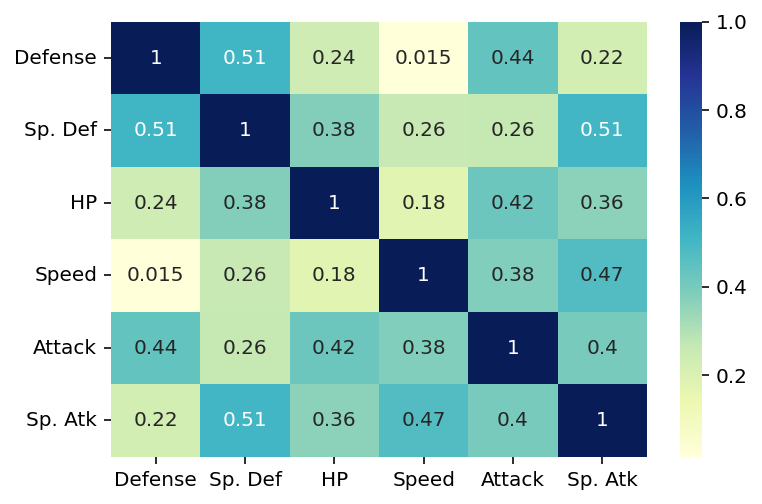

In [216]:
# stats 상관관계
corr = pokemon[stats].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [214]:
stats

['Defense', 'Sp. Def', 'HP', 'Speed', 'Attack', 'Sp. Atk']

### 5.2.2 roc, auc

In [290]:
pred = xgb.predict(X_test) # 테스트 데이터셋에 대한 예측 값 xgb
y_pred = dtc.predict(X_test) # DecisionTreeClassifier

In [297]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, pred) # input 순서 : 실제 라벨, 예측 값
acu_score = roc_auc_score(y_test, pred)

fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred) # input 순서 : 실제 라벨, 예측 값
acu_score2 = roc_auc_score(y_test, y_pred)

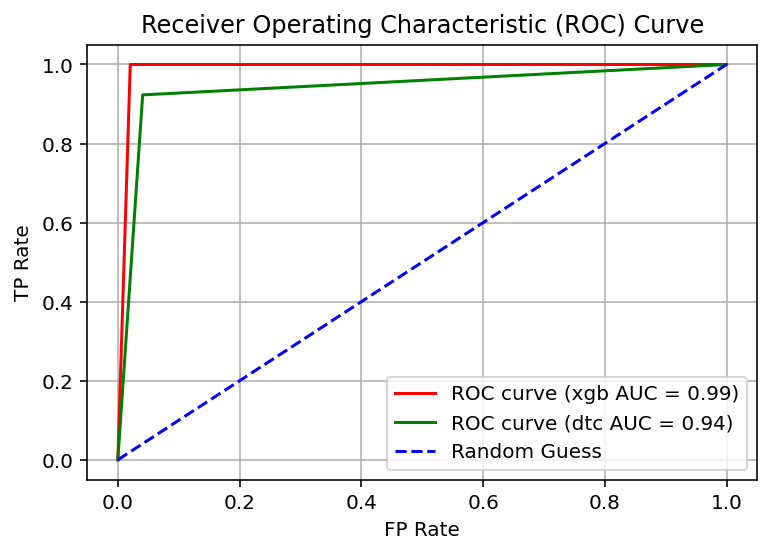

In [299]:
plt.plot(fpr, tpr, color = 'red', label = f'ROC curve (xgb AUC = {acu_score:.2f})')

plt.plot(fpr2, tpr2, color = 'green', label = f'ROC curve (dtc AUC = {acu_score2:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color = 'blue', label = 'Random Guess') # y = x 직선 표시


plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend()
plt.grid(True)

plt.show()

     - x축 : ordinary(음성)을 Legendary(양성)로 잘못 예측한 비율
     - y축 : Legendary를 Legendary로 제대로 예측한 비율
- ROC 커브가 좌상단에 붙어있을 수록 좋은 이진 분류기 \
→ red line: xgb 모델로 향상된 점을 ROC Curve 로도 확인할 수 있다

## 6. 프로젝트 회고
1. 배운점
    - 데이터 처리와 정제: 문자열 데이터를 정규 표현식을 사용하여 처리하는 방법
    - 파이썬의 내장 함수와 라이브러리 활용: set(), len()을 사용하여 중복 데이터를 제거하고 그 크기를 구하는 방법, collections.Counter() 함수를 활용하여 데이터의 분포를 빠르게 파악하는 방법 
    - 시각화 툴 활용: Seaborn과 Matplotlib 라이브러리를 사용하여 데이터의 분포 및 속성 간의 관계를 시각화
    


2. 아쉬운 점 + 추가계획
    - 통계적인 추가 해석을 진행하고 각 데이터 간 관계와 예측 모델을 더 만들어 보고 싶다
    - 포켓몬에 대한 배경지식이 없어서 처음에 이해하는 데 시간이 조금 지체되었다
    - 포켓몬 간 대결 가능한 형태로 두 포켓몬 스탯을 비교해보고 싶다
    - ✔️ 더 다양한 분석 시도: 포켓몬 간의 대결을 분석하는 방법이나, 특정 조건에서의 승률 분석 등 보다 창의적이고 다양한 분석을 시도해보고 싶었습니다. 이러한 분석을 통해 더 흥미로운 인사이트를 발견할 수 있을 것 같다